# Моделирование речного стока с помощью деревьев решений и их ансаблей

План:
+ Одиночное решающее дерево:
    + настройка,
    + интерпретация,


+ Random Forest (случайный лес):
    + запуск по умолчанию,
    + исследование гиперпараметров.

In [3]:
# импорт необходимых библиотек
import numpy as np
import pandas as pd

from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, validation_curve

In [4]:
# загрузка данных
data = pd.read_csv('./data/blackberry_1980-2011.txt', skiprows=12, header=0, sep=';', usecols=[0, 1, 2, 4, 5], 
                   names=['Date', 'Qobs', 'Ptot', 'Temp', 'PE'], index_col=0, parse_dates=True)

In [5]:
# формирование матриц признаков и векторов целевой переменной
X = data[['Ptot', 'Temp', 'PE']].values
y = data['Qobs'].values

X_train = data[['Ptot', 'Temp', 'PE']]['1980':'2000'].values
X_test  = data[['Ptot', 'Temp', 'PE']]['2001':'2011'].values

y_train = data['Qobs']['1980':'2000'].values
y_test  = data['Qobs']['2001':'2011'].values

# Одиночное решающее дерево (ordinary decision tree)

In [6]:
# параметры одиночного решающего дерева
?DecisionTreeRegressor

In [7]:
# создание модели
tree = DecisionTreeRegressor(random_state=0)
# обучение модели
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [8]:
# проверка качества модели
print('результат модели на обучающей выборке:', tree.score(X_train, y_train))
print()
print('результат модели на проверочной выборке:', tree.score(X_test, y_test))

результат модели на обучающей выборке: 0.805924014

результат модели на проверочной выборке: -0.459079954285


**Какой из этого можно сделать вывод?**

### Интерпретация модели

** установим графическую утилиту graphviz**

В терминале набираем:

```sudo apt -y install graphviz```

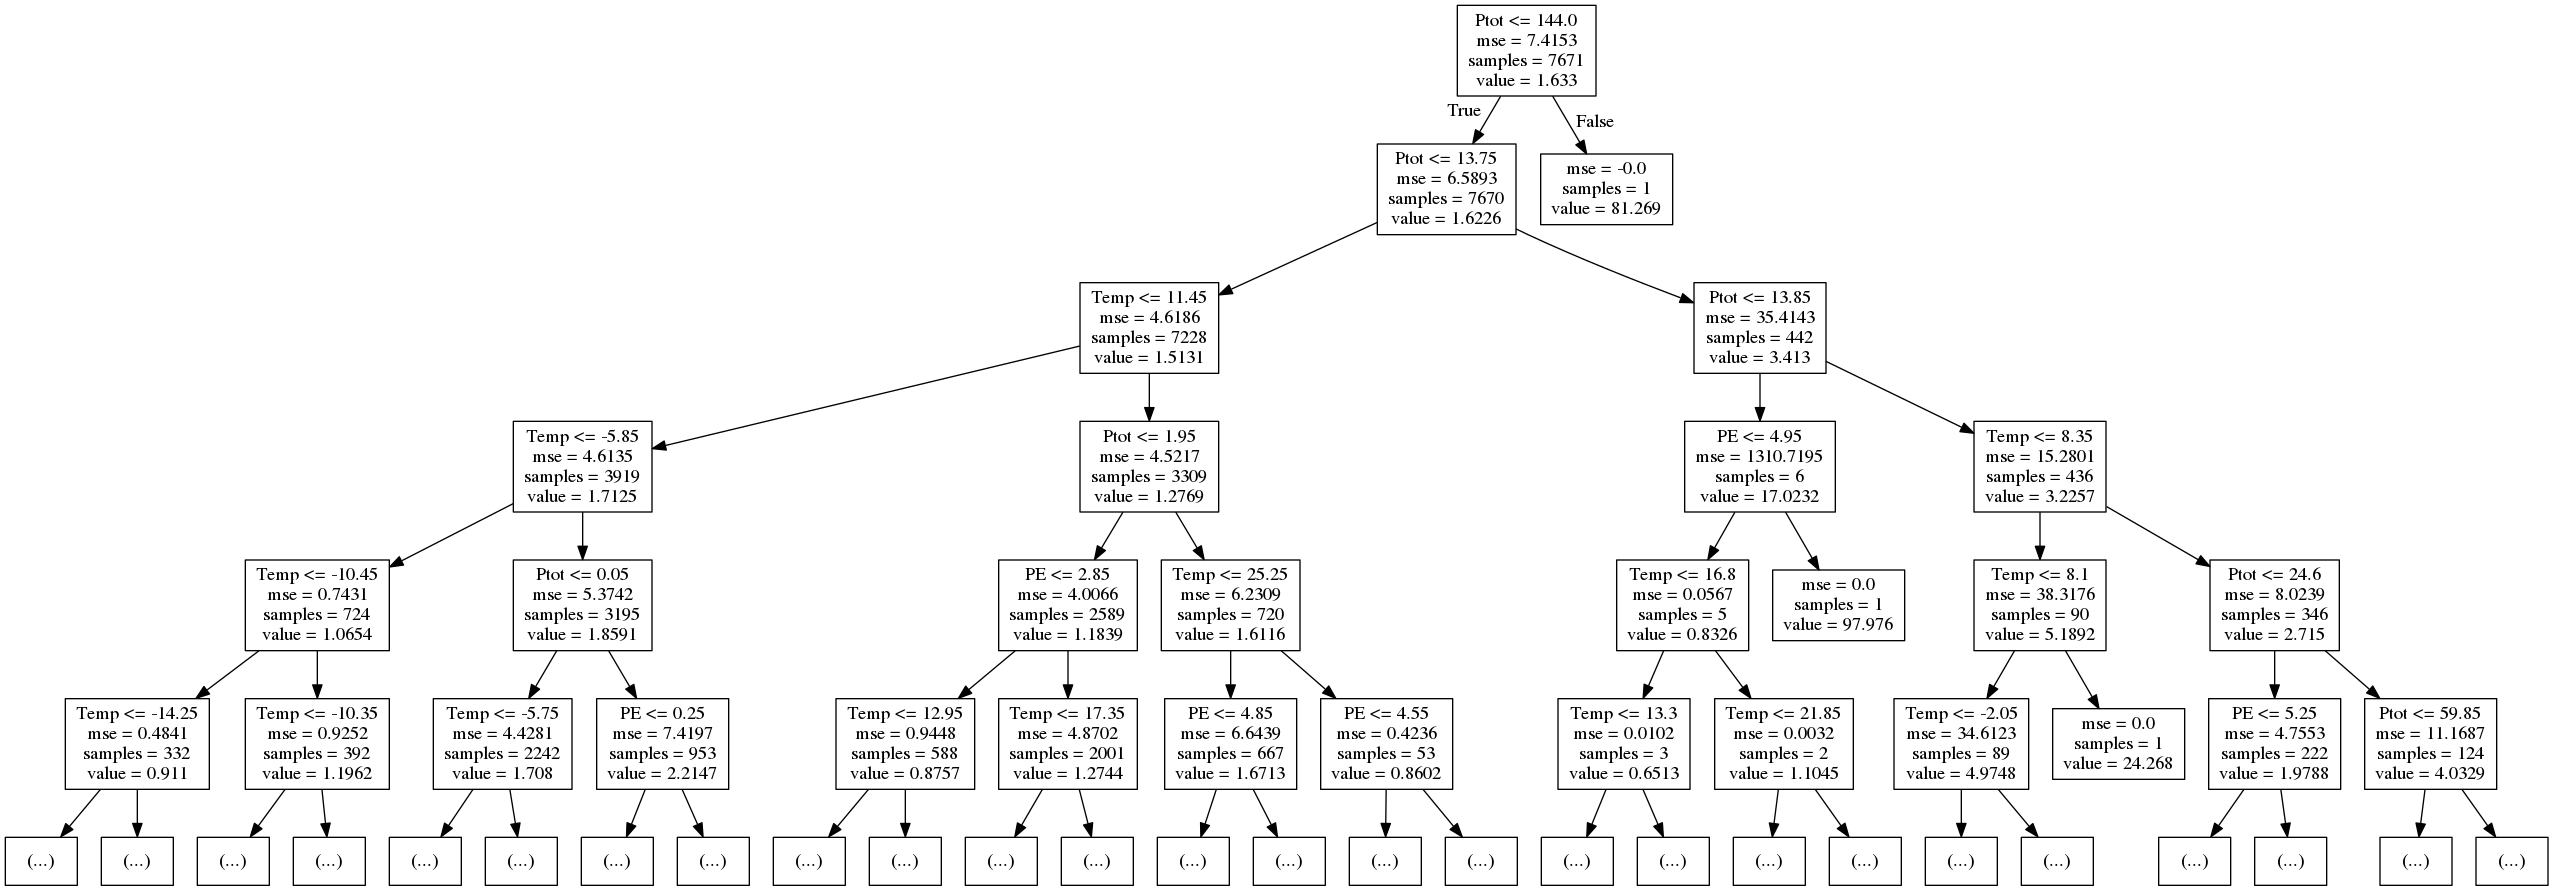

In [9]:
export_graphviz(tree, max_depth=5, feature_names = ['Ptot', 'Temp', 'PE'], out_file='tree.dot')

!dot -Tpng tree.dot -o tree.png

Image('tree.png')

In [10]:
# Проверим обобщающую способность модели на независимых подвыбооках (фолдах)

# Кросс-валидация модели по нескольким независимым фолдам

cross_val_score(DecisionTreeRegressor(max_depth=5, random_state=0), X, y, cv=10)

array([ 0.02938009,  0.05351927,  0.00031115, -0.21432863,  0.02628536,
        0.12192881,  0.0645192 , -0.0694704 ,  0.0274377 , -0.02051938])

**Вывод?**

# Случайный лес (Random Forest)

In [11]:
# создадим модель
forest = RandomForestRegressor(random_state=0)

# обучим модель
forest.fit(X_train, y_train)

# проверим качество модели
print('результат модели на обучающей выборке:', forest.score(X_train, y_train))
print()
print('результат модели на проверочной выборке:', forest.score(X_test, y_test))

результат модели на обучающей выборке: 0.667467916716

результат модели на проверочной выборке: -0.209963935981


**Вывод?**

In [12]:
# исследование гиперпараметров
train_scores, test_scores = validation_curve(
    RandomForestRegressor(), X, y, param_name="n_estimators", 
    param_range=np.arange(10, 200, 10), cv=10, n_jobs=-1)

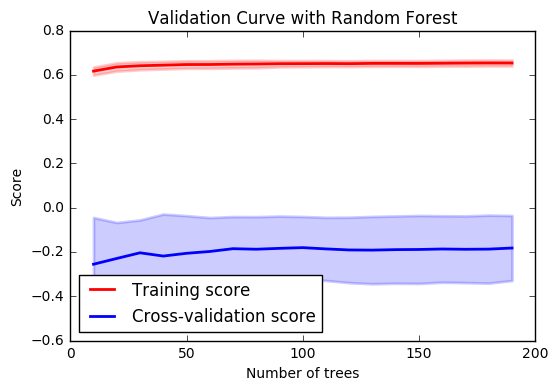

In [13]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of trees")
plt.ylabel("Score")

plt.plot(np.arange(10, 200, 10), train_scores_mean, label="Training score",
             color="red", lw=2)
plt.fill_between(np.arange(10, 200, 10), train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="red", lw=2)
plt.plot(np.arange(10, 200, 10), test_scores_mean, label="Cross-validation score",
             color="blue", lw=2)
plt.fill_between(np.arange(10, 200, 10), test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="blue", lw=2)
plt.legend(loc="best")

**Вывод?**